<a href="https://colab.research.google.com/github/backblaz/DataScience-Exercise/blob/main/Bank_Churners_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Load the dataset
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
### Info of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
df.shape

(10127, 23)

In [ ]:
df.describe


<bound method NDFrame.describe of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0

In [ ]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
# Get numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Get categorical features
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


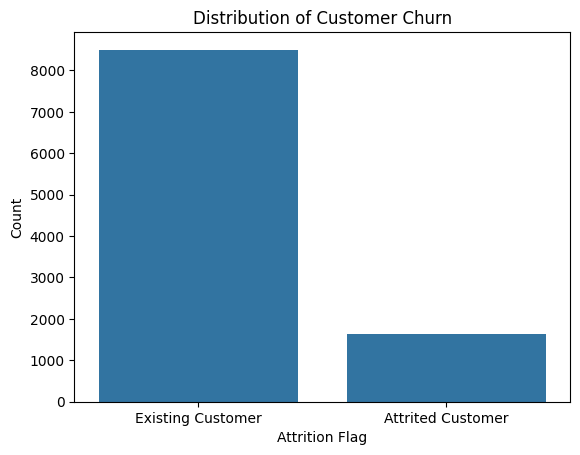

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

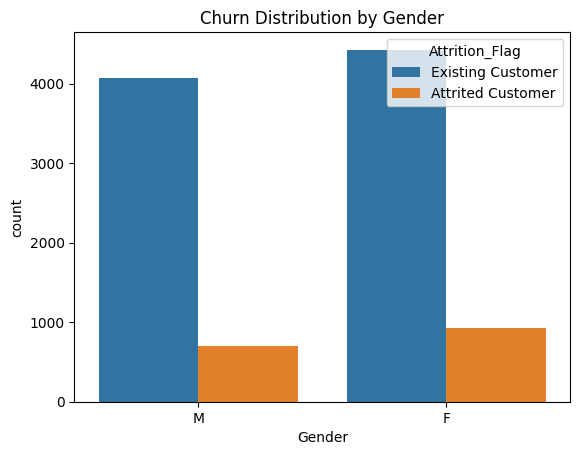

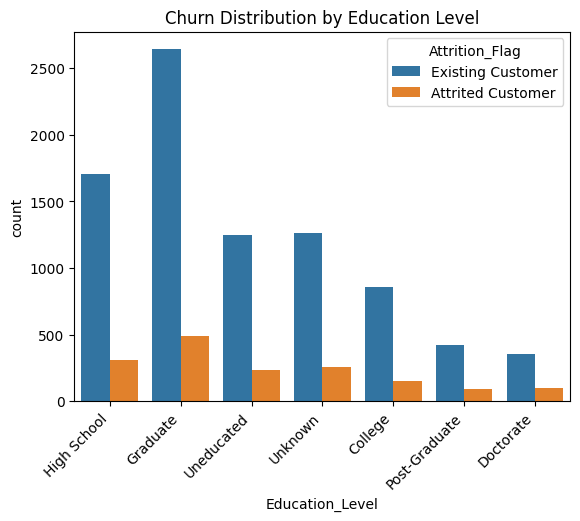

In [ ]:
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Churn Distribution by Gender')
plt.show()

sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df)
plt.title('Churn Distribution by Education Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

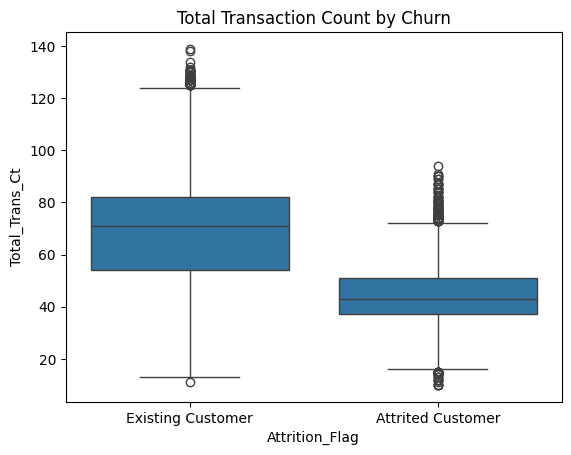

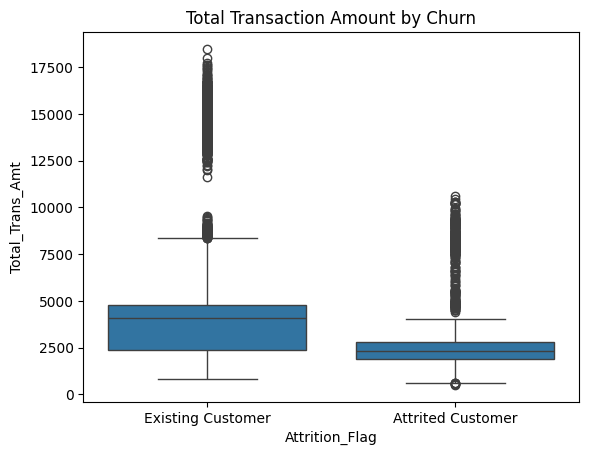

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=df)
plt.title('Total Transaction Count by Churn')
plt.show()

sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=df)
plt.title('Total Transaction Amount by Churn')
plt.show()

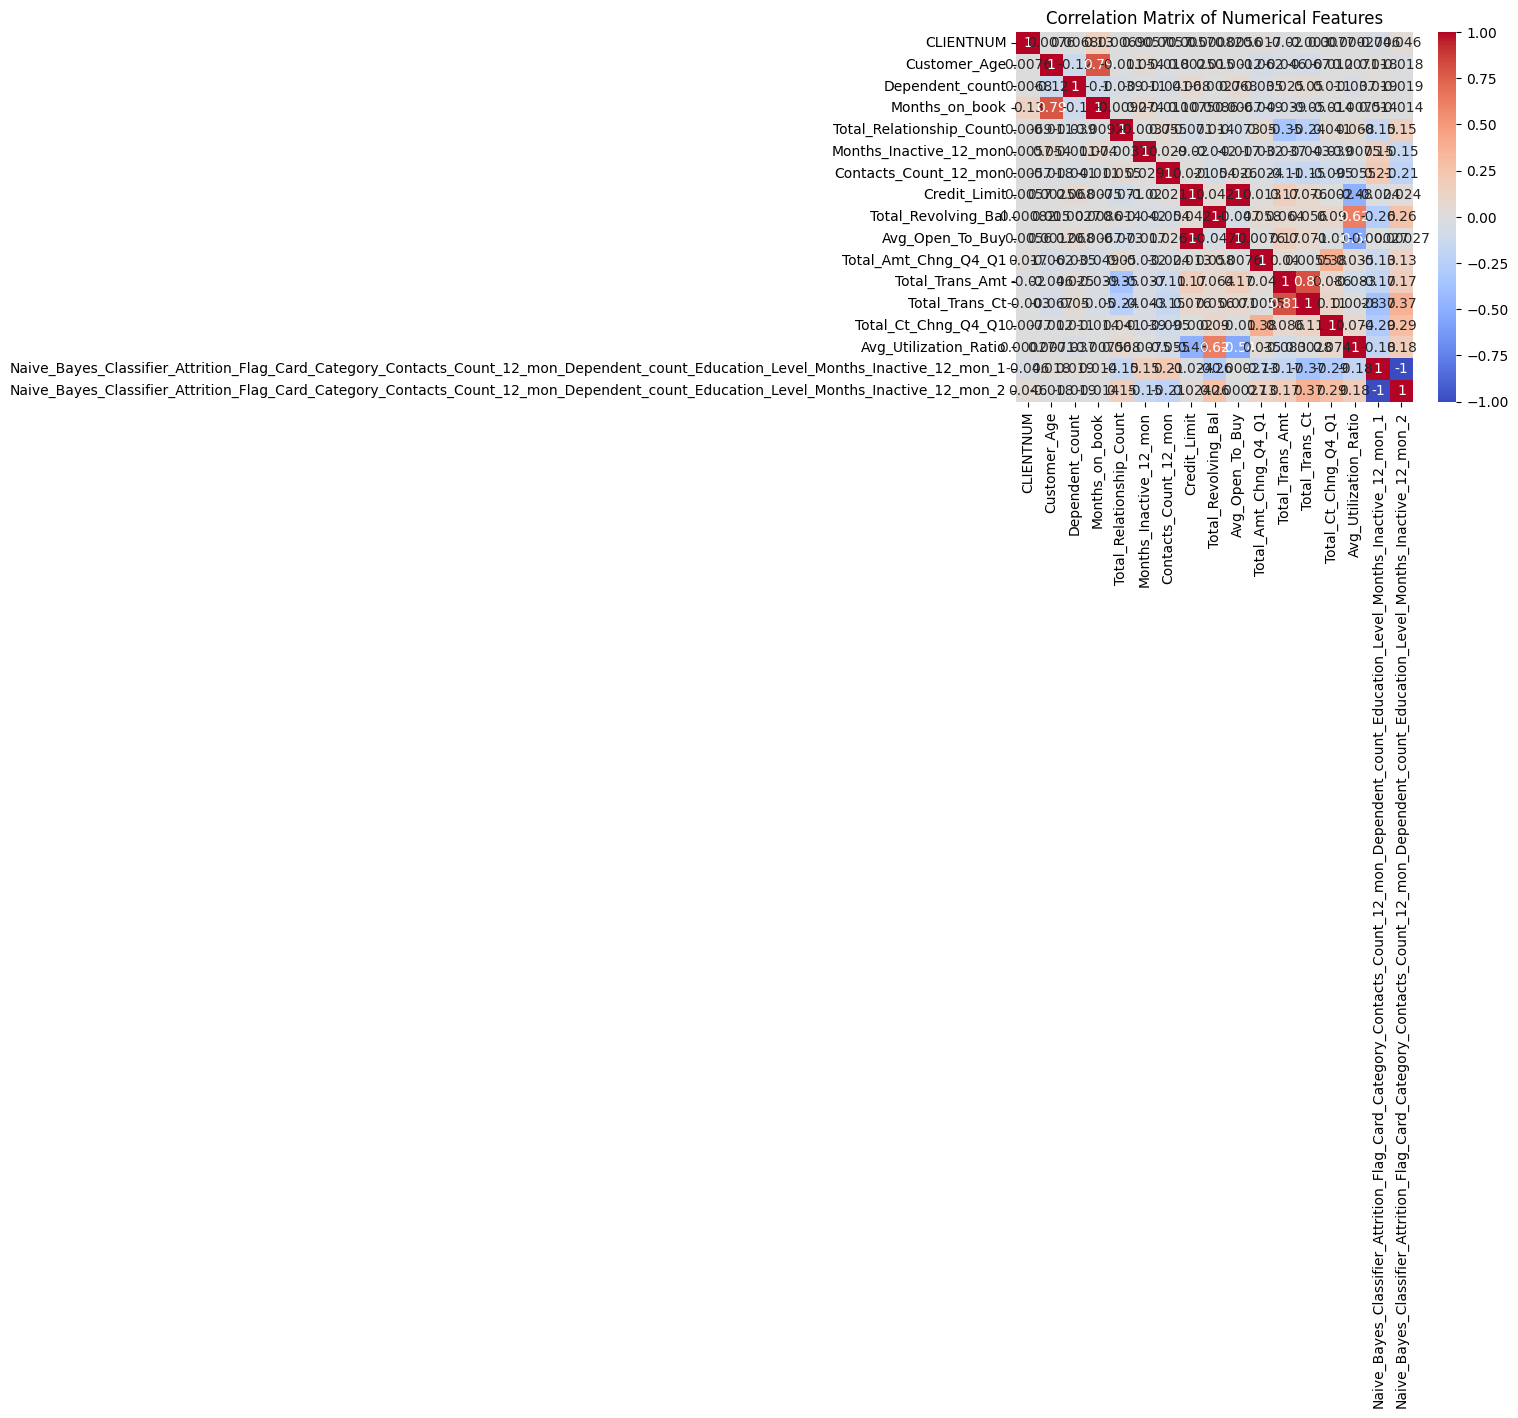

In [ ]:
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

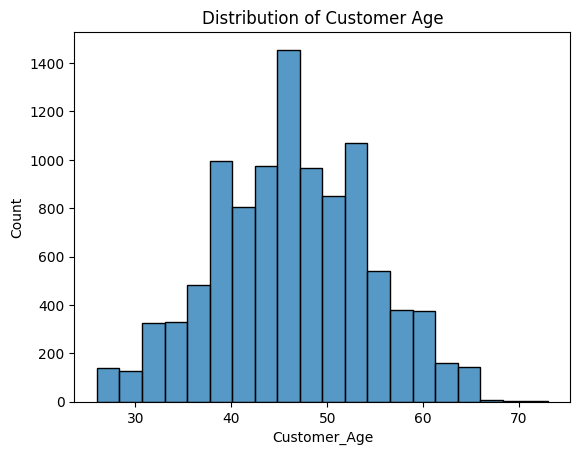

In [ ]:
sns.histplot(x='Customer_Age', data=df, bins=20)
plt.title('Distribution of Customer Age')
plt.show()

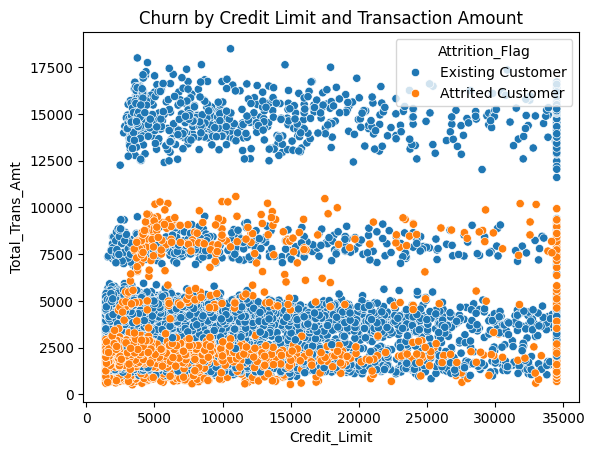

In [ ]:
sns.scatterplot(x='Credit_Limit', y='Total_Trans_Amt', hue='Attrition_Flag', data=df)
plt.title('Churn by Credit Limit and Transaction Amount')
plt.show()

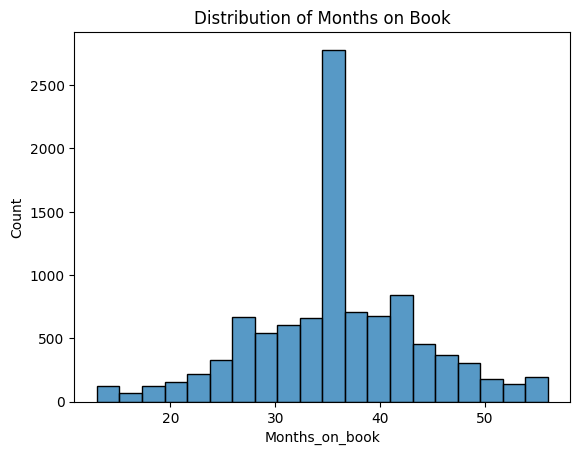

In [ ]:
sns.histplot(x='Months_on_book', data=df, bins=20)
plt.title('Distribution of Months on Book')
plt.show()

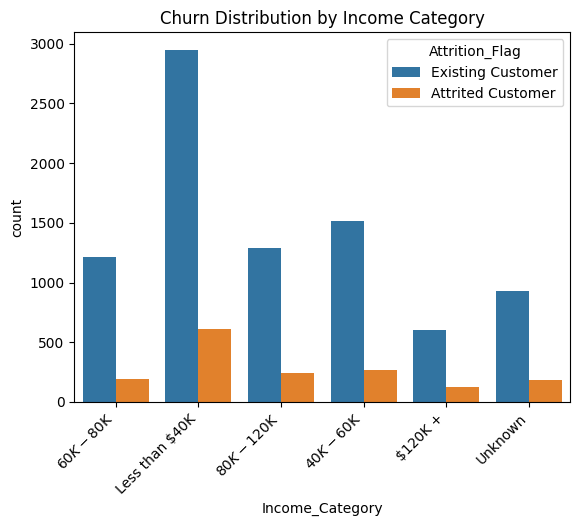

In [ ]:
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.title('Churn Distribution by Income Category')
plt.xticks(rotation=45, ha='right')
plt.show()

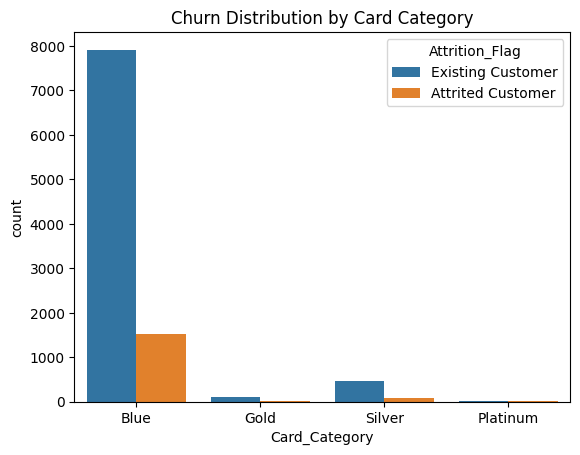

In [ ]:
sns.countplot(x='Card_Category', hue='Attrition_Flag', data=df)
plt.title('Churn Distribution by Card Category')
plt.show()

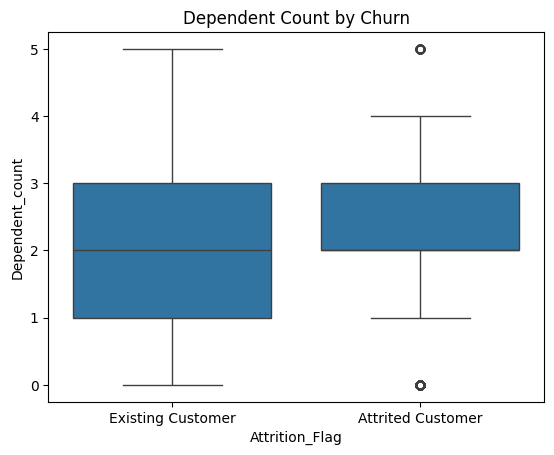

In [ ]:
sns.boxplot(x='Attrition_Flag', y='Dependent_count', data=df)
plt.title('Dependent Count by Churn')
plt.show()

In [ ]:
# Assuming your DataFrame is called 'df'
avg_credit_limit_churned = df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit'].mean()
avg_credit_limit_retained = df[df['Attrition_Flag'] == 'Existing Customer']['Credit_Limit'].mean()

print("Average Credit Limit for Churned Customers:", avg_credit_limit_churned)
print("Average Credit Limit for Retained Customers:", avg_credit_limit_retained)

Average Credit Limit for Churned Customers: 8136.039459127228
Average Credit Limit for Retained Customers: 8726.877517647059


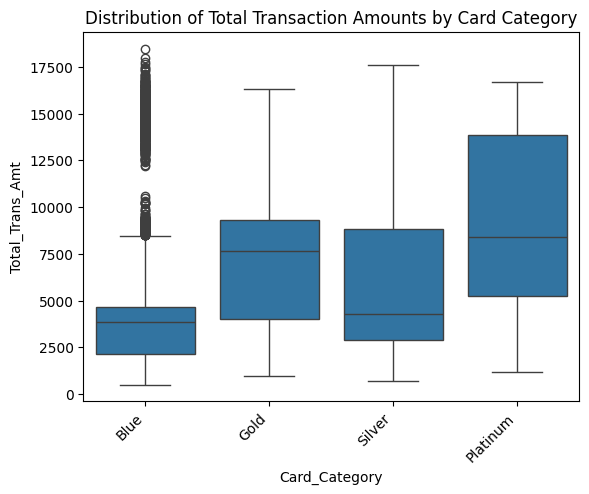

In [ ]:
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df)
plt.title('Distribution of Total Transaction Amounts by Card Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

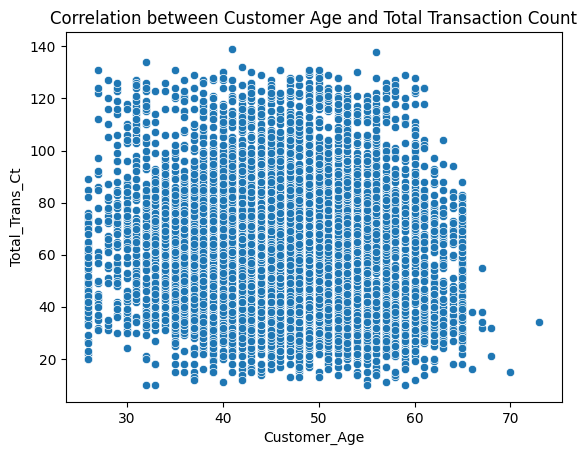

Correlation Coefficient: -0.06709686360085824


In [ ]:

sns.scatterplot(x='Customer_Age', y='Total_Trans_Ct', data=df)
plt.title('Correlation between Customer Age and Total Transaction Count')
plt.show()

# Calculate the correlation coefficient
correlation = df['Customer_Age'].corr(df['Total_Trans_Ct'])
print("Correlation Coefficient:", correlation)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Step 1: Preprocessing

# Drop 'CLIENTNUM' since it's just an identifier
df = df.drop(columns=['CLIENTNUM'])

# Convert 'Attrition_Flag' into a binary variable (1 = Churned, 0 = Existing Customer)
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Encode categorical variables
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop Naive Bayes Classifier columns (if not needed)
df = df.iloc[:, :-2]

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,False,True,False,False,False,True,False,False,False,False
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,False,False,True,False,False,False,False,True,False,False
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,False,True,False,False,False,False,True,False,False,False
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,False,False,False,True,False,False,False,True,False,False
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# Step 2: Train-Test Split
X = df.drop(columns=['Attrition_Flag'])  # Features
y = df['Attrition_Flag']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
ROC-AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1699
           1       1.00      1.00      1.00       327

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



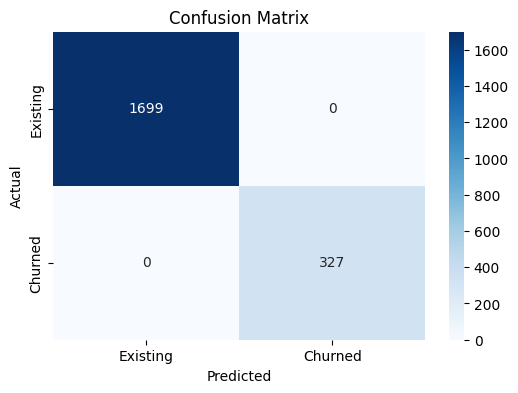

In [ ]:
# Step 5: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Existing', 'Churned'], yticklabels=['Existing', 'Churned'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


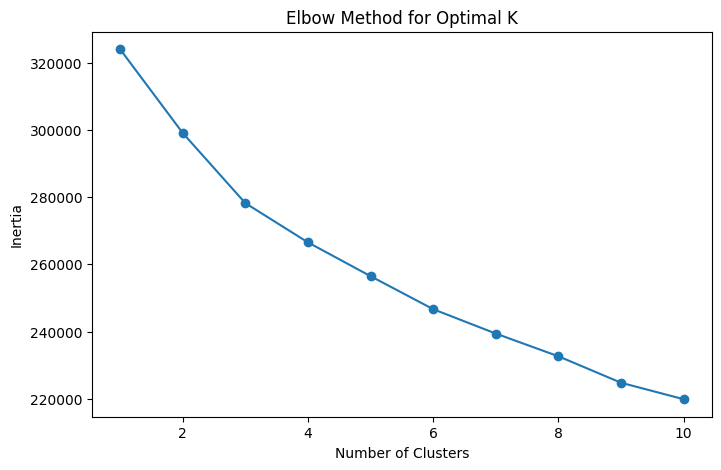

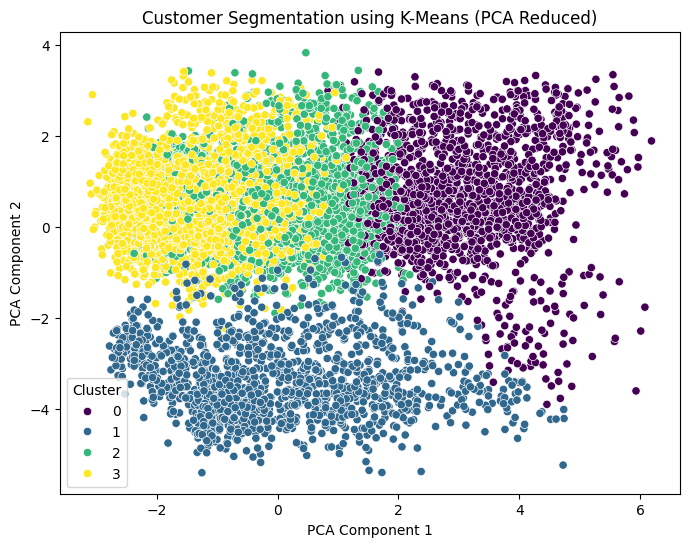

Customer Segmentation Results:


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,46.198135,2.533800,35.843240,3.581585,2.262821,2.408508,24943.436480,1210.241841,23733.194639,0.772603,...,0.421911,0.090909,0.019231,0.180070,0.479021,0.013403,0.089744,0.062937,3.005690,0.674302
1,46.656678,2.393485,36.212378,3.291857,2.701629,2.979153,6693.792313,661.385668,6032.406645,0.686221,...,0.407818,0.078176,0.175896,0.115309,0.123779,0.398697,0.119218,0.003257,-0.058541,-3.400186
2,46.288931,2.323014,35.945278,4.059412,2.249531,2.380550,5799.224984,1298.826767,4500.398218,0.778900,...,0.358349,0.068793,0.464978,0.286429,0.163540,0.000000,0.007192,0.000625,0.029393,0.541439
3,46.279772,2.259108,35.834965,3.923056,2.306960,2.323545,4293.628439,1231.693312,3061.935128,0.768315,...,0.393420,0.068787,0.000000,0.000000,0.000000,0.795541,0.204459,0.000272,-1.403454,0.633676


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Data Preprocessing

# Drop unnecessary columns
df_clustering = df.drop(columns=['CLIENTNUM', 'Attrition_Flag'])

# Convert categorical variables to numerical using One-Hot Encoding
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df_clustering = pd.get_dummies(df_clustering, columns=categorical_cols, drop_first=True)

# Drop Naive Bayes columns (if they exist)
df_clustering = df_clustering.iloc[:, :-2]

# Standardize the data (important for clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Step 2: Choosing Optimal Number of Clusters (Elbow Method)
inertia = []
K_range = range(1, 11)  # Checking for clusters from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Step 3: Apply K-Means Clustering
optimal_k = 4  # Choose K based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clustering['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 4: PCA for Visualization (Reduce to 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_clustering['PCA1'] = df_pca[:, 0]
df_clustering['PCA2'] = df_pca[:, 1]

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clustering['PCA1'], y=df_clustering['PCA2'], hue=df_clustering['Cluster'], palette='viridis')
plt.title('Customer Segmentation using K-Means (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 5: Analyze Cluster Characteristics
cluster_summary = df_clustering.groupby('Cluster').mean()
print("Customer Segmentation Results:")
display(cluster_summary)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Step 1: Data Preprocessing

# Drop unnecessary columns
df_regression = df.drop(columns=['CLIENTNUM', 'Attrition_Flag'])

# Convert categorical variables into numerical using One-Hot Encoding
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df_regression = pd.get_dummies(df_regression, columns=categorical_cols, drop_first=True)

# Drop Naive Bayes columns (if they exist)
df_regression = df_regression.iloc[:, :-2]



In [ ]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 32 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   Customer_Age                                                                                                                        10127 non-null  int64  
 1   Dependent_count                                                                                                                     10127 non-null  int64  
 2   Months_on_book                                                                                                                      10127 non-null  int64  
 3   Total_Relationship_Count                                                         

In [ ]:
# Define features (X) and target (y)
X = df_regression.drop(columns=['Credit_Limit'])  # Features
y = df_regression['Credit_Limit']  # Target variable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Step 2: Train Regression Models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
# Step 3: Model Evaluation

# Compute Metrics
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"🔹 {model_name} Performance:")
    print(f"   - R² Score: {r2:.4f}")
    print(f"   - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   - Mean Squared Error (MSE): {mse:.2f}\n")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

🔹 Linear Regression Performance:
   - R² Score: 1.0000
   - Mean Absolute Error (MAE): 0.00
   - Mean Squared Error (MSE): 0.00

🔹 Random Forest Regression Performance:
   - R² Score: 0.9999
   - Mean Absolute Error (MAE): 35.92
   - Mean Squared Error (MSE): 5077.39



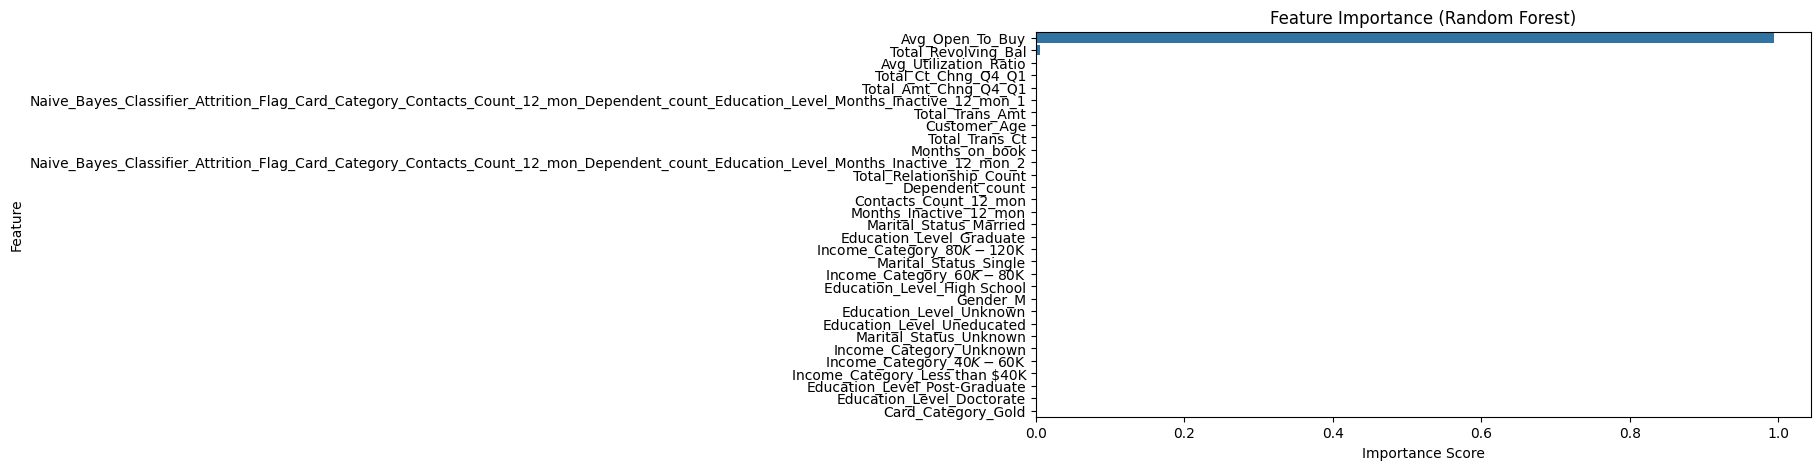

In [ ]:
# Step 4: Feature Importance (Random Forest)
feature_importances = pd.Series(rf_reg.feature_importances_, index=df_regression.drop(columns=['Credit_Limit']).columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()